# Correlation is not Causality

## Does Astra Zeneca Vaccination cause Thrombosis?
Last week the Astra-Zeneca vaccination has been stopped by the german government, because researcher observed a striking accumulation of a specific form of very rare cerebral venous thrombosis associated with platelet deficiency and hemorrhage ([Die Zeit, 17.03.2021: Besondere Thrombosen](https://www.zeit.de/2021/12/astrazeneca-nebenwirkungen-thrombosen-corona-impfung-impfstoff?wt_zmc=sm.ext.zonaudev.mail.ref.zeitde.share.link.x)).

After 7 weeks 1.6 Mio persons has been vaccinated with Astra-Zeneca. Among this population 7 cases of cerebral venous thrombosis has been observed. Extrapolated this would be 32.5 persons per year and per 1 Mio inhabitants. This is almost 3 times the usual number, which is 12 persons per year and 1 Mio.

Hence, without vaccination we had the probability $P(T|\neg V)$ for thrombosis is:

In [1]:
P_TnV=12.5/1000000
P_TnV

1.25e-05

And with Astra-Zeneca vaccination the probability $P(T|V)$ for thrombosis is:

In [2]:
# After 7 weeks vaccination there have been 7 cases per 1.6 Mio vaccinated people
P_TwV=52/7*7/1.6/1000000
P_TwV

3.25e-05

Why should we be suspicious with this probability comparison?

First, the observation period is too short. Knowing that there are in the average 12 cases per year, does not imply that we have 1 case each month. There can be months in a row without any cases, followed by months with more than 1 case. Or in the opposite direction. If we observed 5 cases in a certain month, we can not infer that by the end of the year we will have 60. Actually, this is a frequent mistake in the context of statistical modelling: We cannot afford more experience and learn unreliable models from small samples (training-datasets).

The second reason, why we should not infer from 

$$
P(T|V) > P(T|\neg V)
$$ (prel)

that Astra-Zeneca vaccination causes cebral venous thrombosis is that **correlation is not causation**. If we observe, that the ratio of cerebral thrombosis cases is higher for vaccinated people than for non-vaccinated people, we have a correlation between these two variables. However, we don't know if the one variable (vaccination) **causes** a higher probability for the other (thrombosis).  


Actually, as already stated in [Die Zeit, 17.03.2021: Besondere Thrombosen](https://www.zeit.de/2021/12/astrazeneca-nebenwirkungen-thrombosen-corona-impfung-impfstoff?wt_zmc=sm.ext.zonaudev.mail.ref.zeitde.share.link.x), the true cause for the higher rate of thrombosis cases may not be vaccination but age. Long before vaccination researchers observed that almost only younger people (< 50 years) are affected by cerebral venous thrombosis. 

$$
P(T|Age<50) > P(T|Age \geq 50)
$$ (p_age)

On the other hand Astra-Zenaca vaccination is currently provided only to *younger* people (< 65 years), and the probability that persons of age $ \geq 65$ get this vaccination is zero:

$$
P(V|Age \geq 65) = 0
$$ (p_vage)

Hence, it is clear that a higher rate of thrombosis under the vaccinated peoples can be expected, also in the case that vaccination has absolute no impact on thrombosis. 

In summary, we know, that cerebral venous thrombosis depends on age, but we don't know if it also depends on Astra-Zeneca vaccination. If we can prove that 

$$
P(T|Age,V) = P(T|Age)
$$ (p_vindep)

than the probability for thrombosis is independent of vaccination. 

How can we prove this?

Answer: We need a sufficiently large sample of test persons. This sample is partionend into 2 subgroups, such that the age-distribution in both subgroups is the same. Then both subgroups are vaccinated, the first by Astra-Zeneca and the second by a placebo. If in both subgroups the rate of thrombosis is similar, then we can conclude thrombosis is not caused by Astra-Zeneca vaccination.


The question **Is Thrombosis independent of Vaccination?** can be visualized by Bayesian networks as depicted below:

In [3]:
#!pip install daft

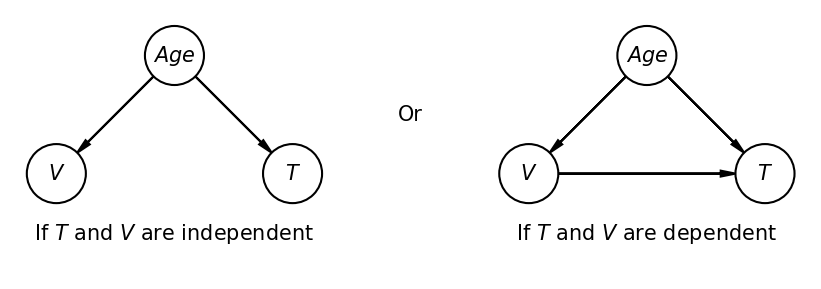

In [4]:
import daft
from matplotlib import rc

pgm = daft.PGM()
pgm.add_node("A",r"$Age$",0,1)
pgm.add_node("V",r"$V$",-1,0)
pgm.add_node("T",r"$T$",1,0)
pgm.add_edge("A","V")
pgm.add_edge("A","T")

pgm.add_node("I",r"If $T$ and $V$ are independent",0,-0.5,plot_params={"ec":"none"})

pgm.add_node("Q",r"Or",2,0.5,plot_params={"ec":"none"})

pgm.add_node("B",r"$Age$",4,1)
pgm.add_node("C",r"$V$",3,0)
pgm.add_node("D",r"$T$",5,0)
pgm.add_edge("B","C")
pgm.add_edge("B","D")
pgm.add_edge("C","D")

pgm.add_node("R",r"If $T$ and $V$ are dependent",4,-0.5,plot_params={"ec":"none"})

pgm.render(dpi=150)
pgm.savefig("AgeVacThromb.png")

Actually, we do not have only the two options sketched above: It is known that birth-control-pills increase the risk for cerebral venous thrombosis. Moreover, it can be supposed that more younger people (<50 years) consume such pills. Then, maybe not age causes thrombosis but birth-control-pills. In this case the two bayesian networks above must be extended as follows:

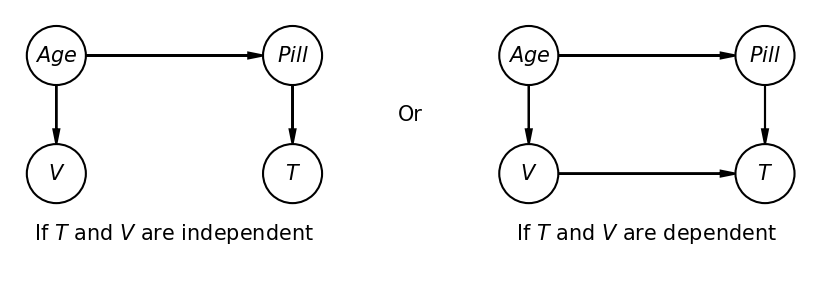

In [5]:
pgm = daft.PGM()
pgm.add_node("A",r"$Age$",-1,1)
pgm.add_node("V",r"$V$",-1,0)
pgm.add_node("T",r"$T$",1,0)
pgm.add_node("P",r"$Pill$",1,1)
pgm.add_edge("A","V")
pgm.add_edge("A","P")
pgm.add_edge("P","T")

pgm.add_node("I",r"If $T$ and $V$ are independent",0,-0.5,plot_params={"ec":"none"})

pgm.add_node("Q",r"Or",2,0.5,plot_params={"ec":"none"})

pgm.add_node("B",r"$Age$",3,1)
pgm.add_node("C",r"$V$",3,0)
pgm.add_node("D",r"$T$",5,0)
pgm.add_node("P2",r"$Pill$",5,1)
pgm.add_edge("B","C")
pgm.add_edge("B","P2")
pgm.add_edge("P2","D")
pgm.add_edge("C","D")

pgm.add_node("R",r"If $T$ and $V$ are dependent",4,-0.5,plot_params={"ec":"none"})

pgm.render(dpi=150)
pgm.savefig("AgeVacThromb2.png")

Right now, we do not know which of the 4 options is true. Possibly, there exist even more options. As already mentioned above, in order to find out the influencing variables (nodes) and their dependencies (edges) a well-designed user-test must be carried out. From these user-test also the conditional-probability-tables for all nodes in the bayes net can be obtained.